In [1]:
### 常规分析包
import os
import time
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm, pearsonr, spearmanr
from scipy.spatial import distance
### 绘图包
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42 # 输出PDF文字可编辑
### 其他
import cloudpickle as pickle
import warnings
warnings.filterwarnings("ignore") # 报错提示
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #last_expr

# Meta data

In [2]:
meta = pd.read_csv('../Data_preprocess/1.1.MetaData.tsv', sep='\t', index_col=0)
meta.head(2)

,SampleID,SampleID_1,Child_ID,Sample_type,Day,Time,MotherID,WMS,Gender,Mode of delivery,...,Day of the last sample,Number of samples,Day of introducing solid food,Day of breastfeeding cessation,Solid food,Breastfeeding,"Feeding mode(BFD:0,MFD:1)","Sibling(Y:1,N:0)","PAE(Y:1,N:0)","Allergy(Y:1,N:0)"
ID,,,,,,,,,,,,,,,,,,,,,
C11_10,11_10,D_10,11,C,25.0,T10,M11_M,0,Female,C-section,...,352.0,25.0,176.0,356.0,0.0,1.0,0.0,0.0,0.0,1.0
C11_11,11_11,D_11,11,C,29.0,T11,M11_M,0,Female,C-section,...,352.0,25.0,176.0,356.0,0.0,1.0,0.0,0.0,0.0,1.0


# iACMP

# 1. QPEN

In [3]:
qpen = pd.read_csv('../Results_0609/iACMP_boot20/qpen.out_prune_boot1000.csv', index_col=None)
qpen.head(2)
set(qpen['result.process'])

,ratio.Heterogeneous.Selection,ratio.Homogeneous.Selection,ratio.Dispersal.Limitation,ratio.Homogenizing.Dispersal,ratio.Undominated,ratio.num.pair,result.sample1,result.sample2,result.bMNTD,result.BC,result.bNTI,result.RC,result.process
0,0.207116,0.414685,0.230957,0.01977,0.127472,108345,C1_11,C11_10,0.365784,0.994853,10.764065,1.0,Heterogeneous.Selection
1,0.207116,0.414685,0.230957,0.01977,0.127472,108345,C1_12,C11_10,0.386254,0.998496,8.110962,1.0,Heterogeneous.Selection


{'Dispersal.Limitation',
 'Heterogeneous.Selection',
 'Homogeneous.Selection',
 'Homogenizing.Dispersal',
 'Undominated'}

In [4]:
Times = ['M', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 
         'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27']
types = ['Heterogeneous.Selection', 'Homogeneous.Selection', 'Dispersal.Limitation', 
         'Homogenizing.Dispersal', 'Undominated']

results = []
for t in Times[2:]:
    t
    if int(t[1:])<=2:
        samples = set(meta.loc[(meta['Time']=='T1')|(meta['Time']=='T2'), :].index)
        pairs = []
        for i in samples:
            if 'M'+i.split('_')[0][1:]+'_M' in meta.index:
                pairs.append(['M'+i.split('_')[0][1:]+'_M', i])
    else:
        samples = set(meta.loc[meta['Time']==t, :].index)
        pairs = []
        for i in samples:
            if i.split('_')[0]+'_'+str(int(t[1:])-1) in meta.index:
                pairs.append([i.split('_')[0]+'_'+str(int(t[1:])-1), i])
    res = []
    for pair in pairs:
        for i in qpen.index:
            if qpen.loc[i, 'result.sample1'] in pair and qpen.loc[i, 'result.sample2'] in pair:
                res.append(qpen.loc[i, 'result.process'])
    results.append([round(res.count(i)/float(len(res)), 3) for i in types])
results = pd.DataFrame(results, index=Times[2:], columns=types)
results

'T2'

'T3'

'T4'

'T5'

'T6'

'T7'

'T8'

'T9'

'T10'

'T11'

'T12'

'T13'

'T14'

'T15'

'T16'

'T17'

'T18'

'T19'

'T20'

'T21'

'T22'

'T23'

'T24'

'T25'

'T26'

'T27'

,Heterogeneous.Selection,Homogeneous.Selection,Dispersal.Limitation,Homogenizing.Dispersal,Undominated
T2,0.333,0.250,0.333,0.000,0.083
T3,0.200,0.500,0.000,0.200,0.100
T4,0.067,0.800,0.067,0.067,0.000
T5,0.000,0.737,0.000,0.263,0.000
T6,0.000,0.833,0.000,0.167,0.000
T7,0.000,0.778,0.000,0.167,0.056
T8,0.056,0.778,0.000,0.167,0.000
T9,0.059,0.647,0.000,0.294,0.000
T10,0.000,0.786,0.000,0.214,0.000
T11,0.000,0.636,0.000,0.273,0.091


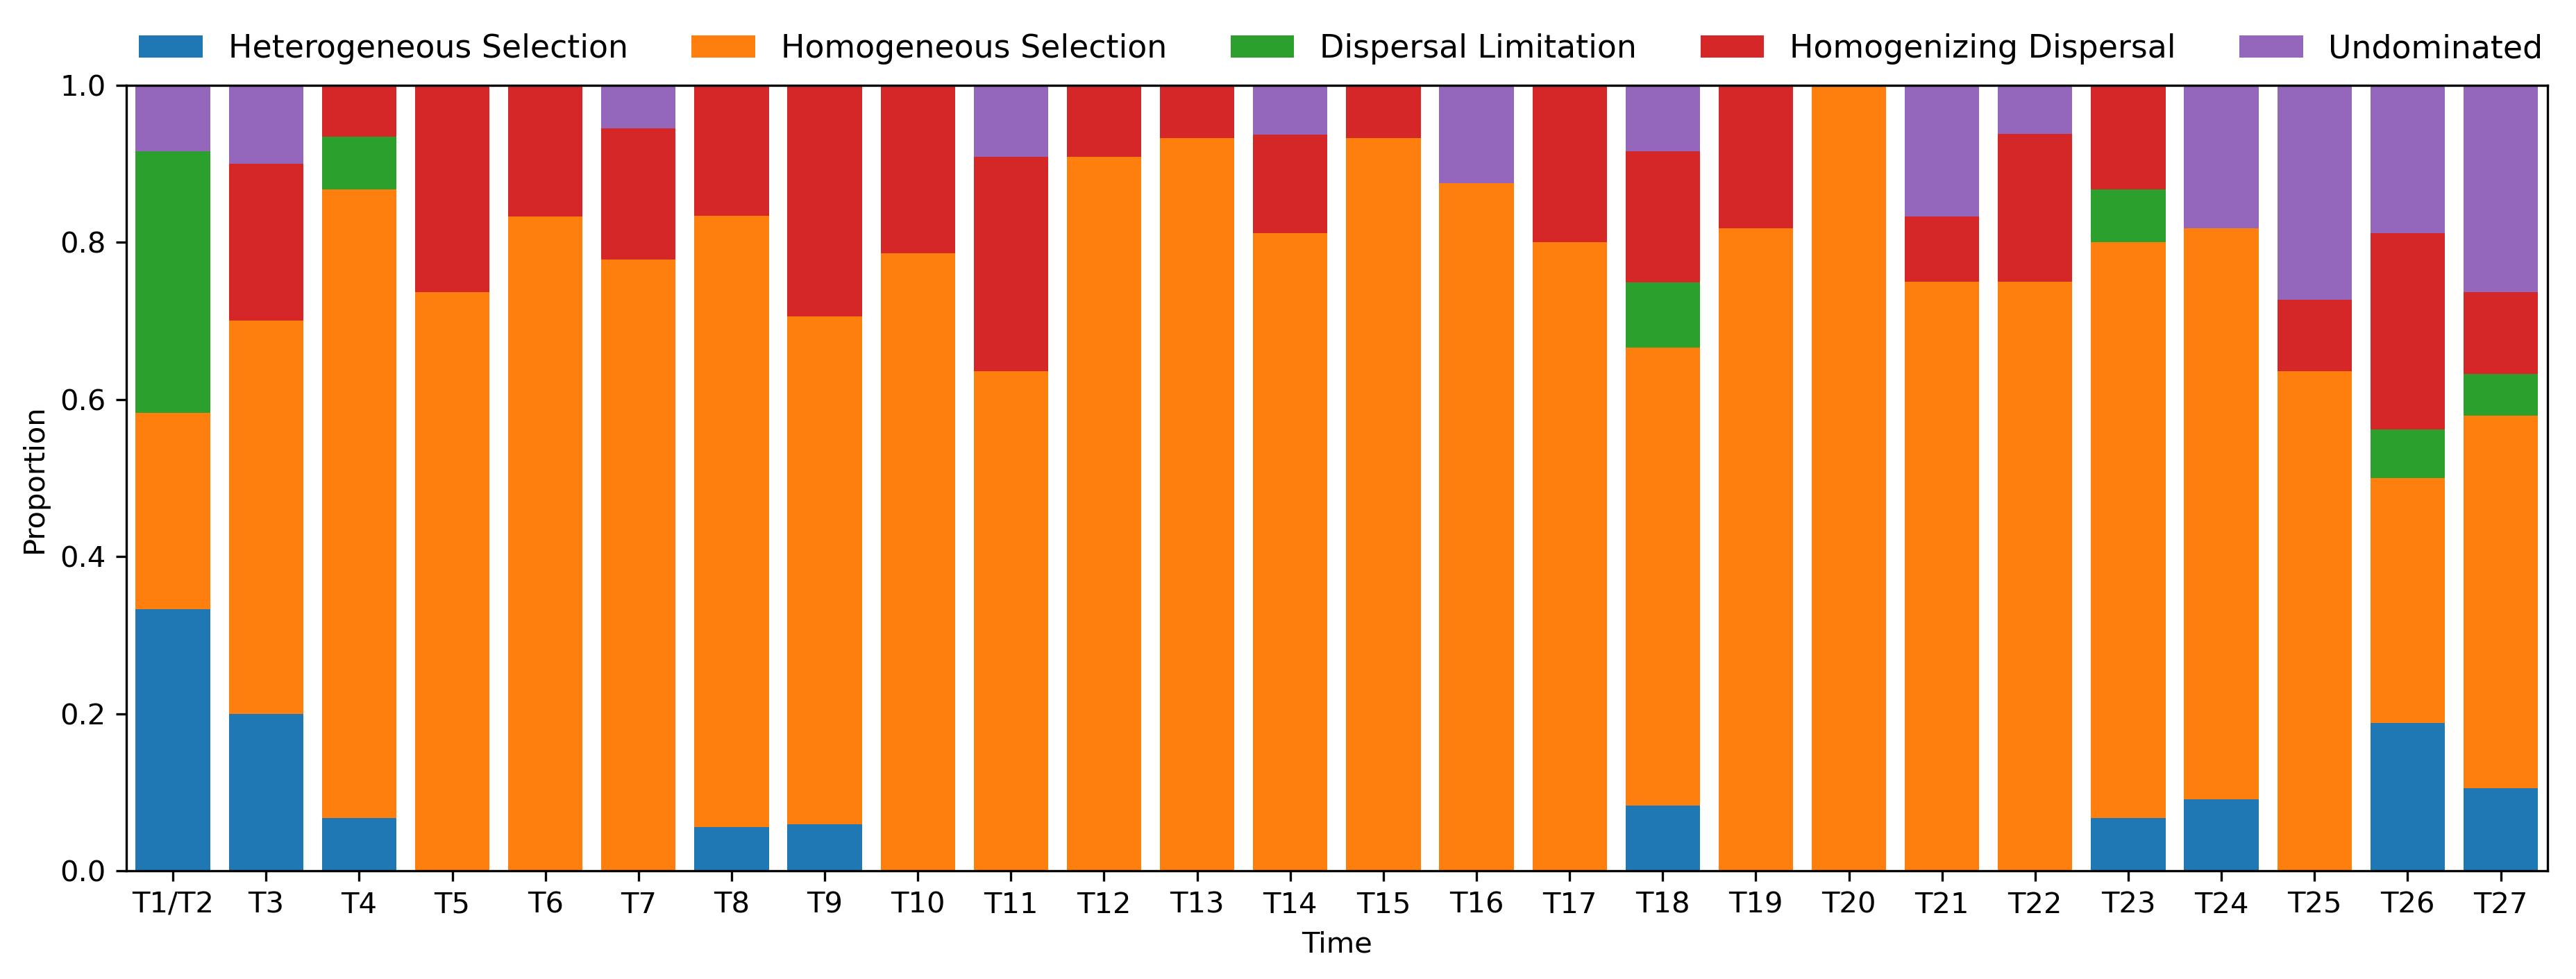

In [68]:
fig = plt.figure(figsize=(15, 5), dpi=300)
bottom = np.zeros(results.shape[0])
_ = plt.bar(x=range(results.shape[0]), height=results['Heterogeneous.Selection'], bottom = bottom, label='Heterogeneous Selection')
bottom += results['Heterogeneous.Selection']

_ = plt.bar(x=range(results.shape[0]), height=results['Homogeneous.Selection'], bottom = bottom, label='Homogeneous Selection')
bottom += results['Homogeneous.Selection']

_ = plt.bar(x=range(results.shape[0]), height=results['Dispersal.Limitation'], bottom = bottom, label='Dispersal Limitation')
bottom += results['Dispersal.Limitation']

_ = plt.bar(x=range(results.shape[0]), height=results['Homogenizing.Dispersal'], bottom = bottom, label='Homogenizing Dispersal')
bottom += results['Homogenizing.Dispersal']

_ = plt.bar(x=range(results.shape[0]), height=results['Undominated'], bottom = bottom, label='Undominated')

xtick_labels = ['T1/T2'] + Times[3:]
_ = plt.xticks(range(results.shape[0]), xtick_labels)
_ = plt.xlim([-0.5, 25.5])
_ = plt.ylim([0, 1])
_ = plt.legend(loc=(0.00, 1.01), frameon=False, ncol=5, fontsize=11.)
_ = plt.xlabel('Time')
_ = plt.ylabel('Proportion')
fig.savefig('../Results_0609/5.1. QPEN儿童种群形成情况.pdf', dpi=300)

In [6]:
results.head(2)

,Heterogeneous.Selection,Homogeneous.Selection,Dispersal.Limitation,Homogenizing.Dispersal,Undominated
T2,0.333,0.25,0.333,0.0,0.083
T3,0.200,0.50,0.000,0.2,0.100


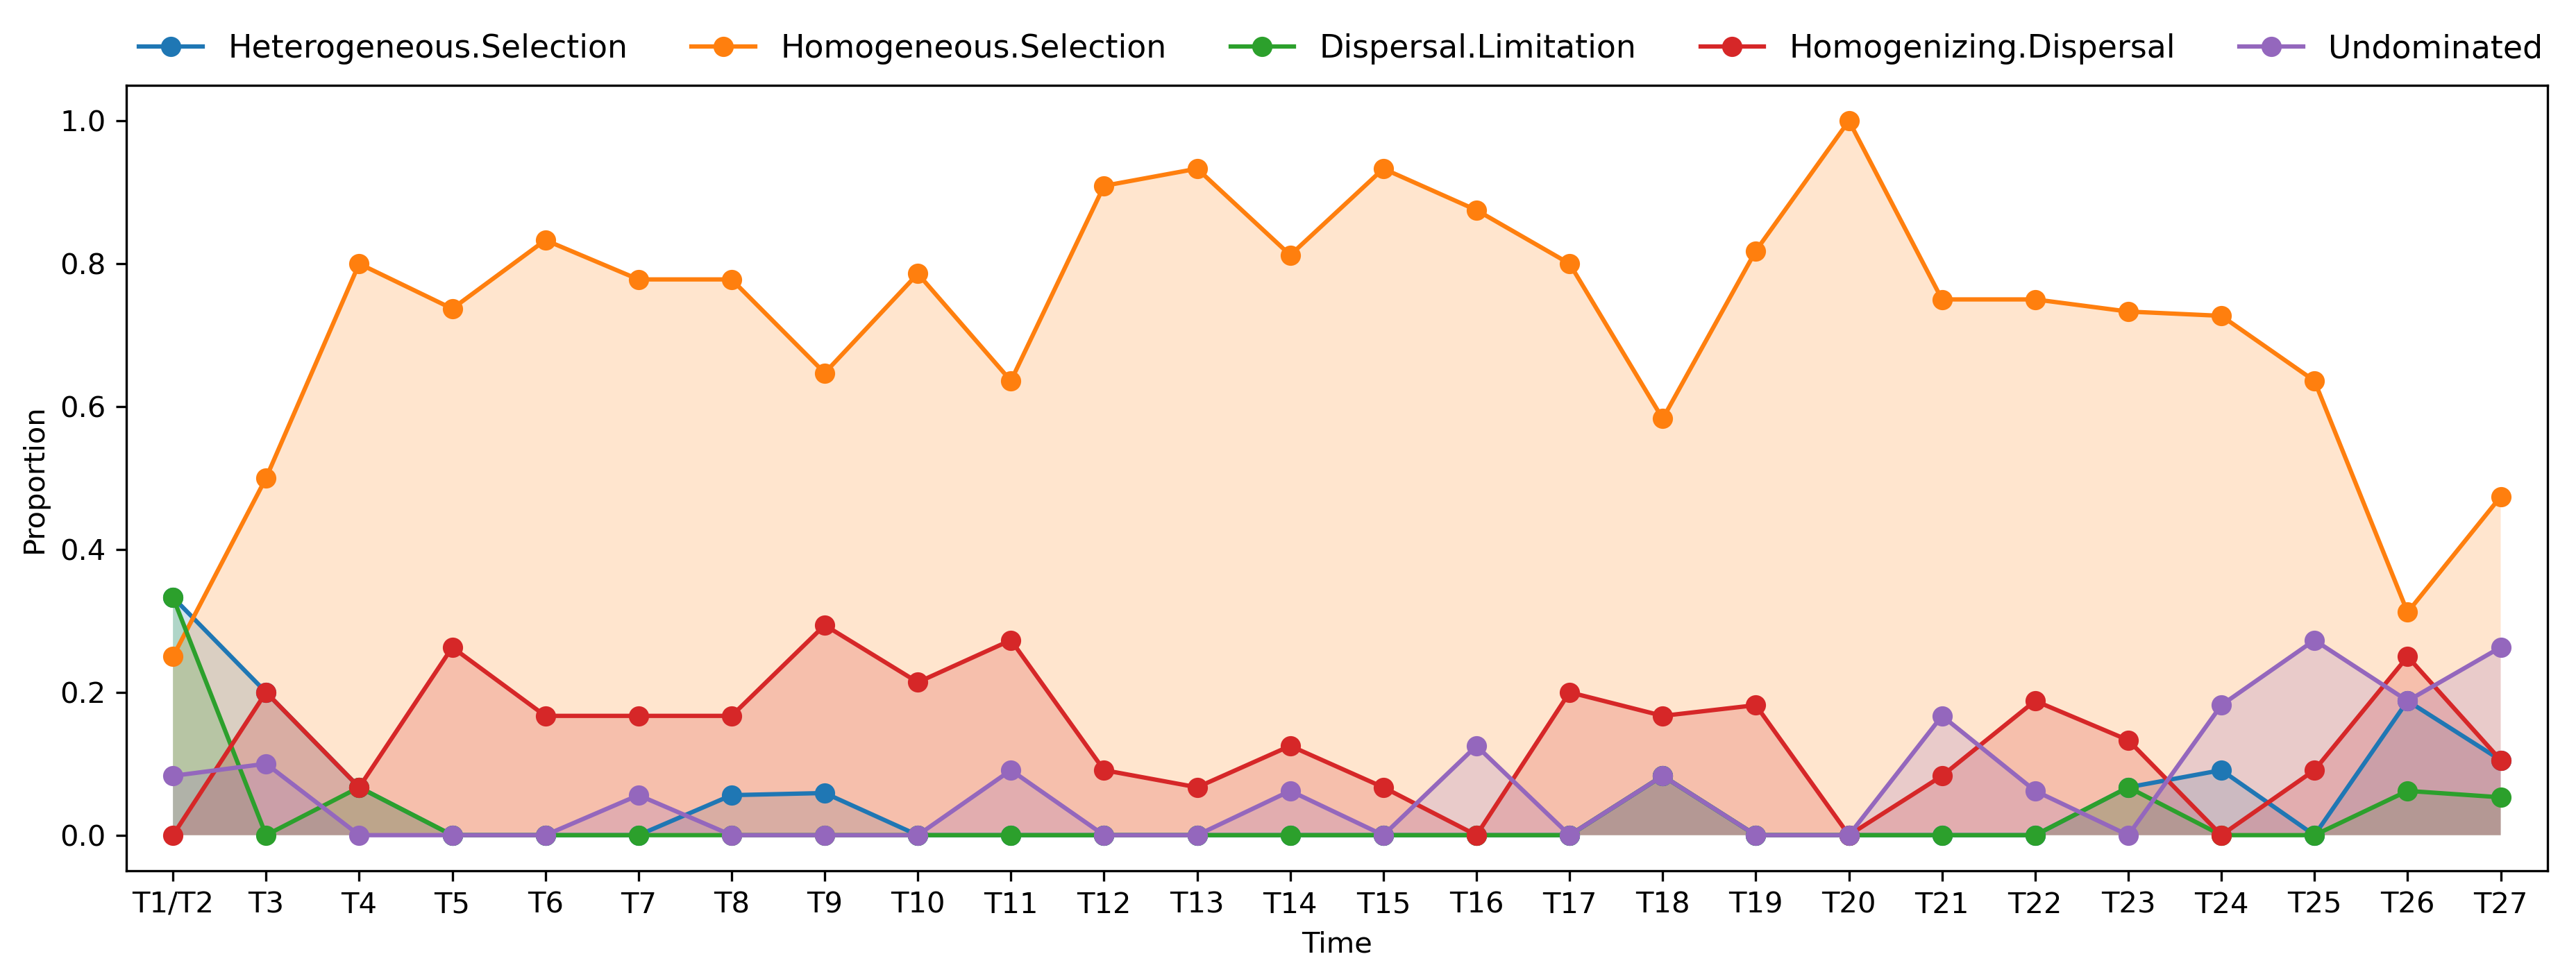

In [91]:
results['time'] = [int(i[1:]) for i in results.index]
fig = plt.figure(figsize=(15, 5), dpi=300)
_ = plt.plot(results["time"], results["Heterogeneous.Selection"], marker='o', label='Heterogeneous.Selection')
_ = plt.fill_between(results["time"], results["Heterogeneous.Selection"], alpha=0.2)

_ = plt.plot(results["time"], results["Homogeneous.Selection"], marker='o', label='Homogeneous.Selection')
_ = plt.fill_between(results["time"], results["Homogeneous.Selection"], alpha=0.2)

_ = plt.plot(results["time"], results["Dispersal.Limitation"], marker='o', label='Dispersal.Limitation')
_ = plt.fill_between(results["time"], results["Dispersal.Limitation"], alpha=0.2)

_ = plt.plot(results["time"], results["Homogenizing.Dispersal"], marker='o', label='Homogenizing.Dispersal')
_ = plt.fill_between(results["time"], results["Homogenizing.Dispersal"], alpha=0.2)

_ = plt.plot(results["time"], results["Undominated"], marker='o', label='Undominated')
_ = plt.fill_between(results["time"], results["Undominated"], alpha=0.2)


xtick_labels = ['T1/T2'] + Times[3:]
_ = plt.xticks(range(2, results.shape[0]+2), xtick_labels)
_ = plt.xlim([1.5, 27.5])
_ = plt.ylim([-0.05, 1.05])
_ = plt.legend(loc=(0.00, 1.01), frameon=False, ncol=5, fontsize=11.)
_ = plt.xlabel('Time')
_ = plt.ylabel('Proportion')
fig.savefig('../Results_0609/5.1. QPEN儿童种群形成情况_line.pdf', dpi=300)

### beta-NTI

In [25]:
qpen.head(2)
Times = ['M', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 
         'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27']
res_NTI = []
for t in Times[2:]:
    t
    if int(t[1:])<=2:
        samples = set(meta.loc[(meta['Time']=='T1')|(meta['Time']=='T2'), :].index)
        pairs = []
        for i in samples:
            if 'M'+i.split('_')[0][1:]+'_M' in meta.index:
                pairs.append(['M'+i.split('_')[0][1:]+'_M', i])
    else:
        samples = set(meta.loc[meta['Time']==t, :].index)
        pairs = []
        for i in samples:
            if i.split('_')[0]+'_'+str(int(t[1:])-1) in meta.index:
                pairs.append([i.split('_')[0]+'_'+str(int(t[1:])-1), i])
    res = []
    for pair in pairs:
        for i in qpen.index:
            if qpen.loc[i, 'result.sample1'] in pair and qpen.loc[i, 'result.sample2'] in pair:
                res_NTI.append([t, qpen.loc[i, 'result.bNTI']])
res_NTI = pd.DataFrame(res_NTI, columns=['Time', 'bNTI'])
res_NTI

,ratio.Heterogeneous.Selection,ratio.Homogeneous.Selection,ratio.Dispersal.Limitation,ratio.Homogenizing.Dispersal,ratio.Undominated,ratio.num.pair,result.sample1,result.sample2,result.bMNTD,result.BC,result.bNTI,result.RC,result.process
0,0.207116,0.414685,0.230957,0.01977,0.127472,108345,C1_11,C11_10,0.365784,0.994853,10.764065,1.0,Heterogeneous.Selection
1,0.207116,0.414685,0.230957,0.01977,0.127472,108345,C1_12,C11_10,0.386254,0.998496,8.110962,1.0,Heterogeneous.Selection


'T2'

'T3'

'T4'

'T5'

'T6'

'T7'

'T8'

'T9'

'T10'

'T11'

'T12'

'T13'

'T14'

'T15'

'T16'

'T17'

'T18'

'T19'

'T20'

'T21'

'T22'

'T23'

'T24'

'T25'

'T26'

'T27'

,Time,bNTI
0,T2,4.158191
1,T2,0.118813
2,T2,-3.460785
3,T2,1.690820
4,T2,1.267841
...,...,...
369,T27,3.434460
370,T27,-0.304430
371,T27,-3.077531
372,T27,-3.521120


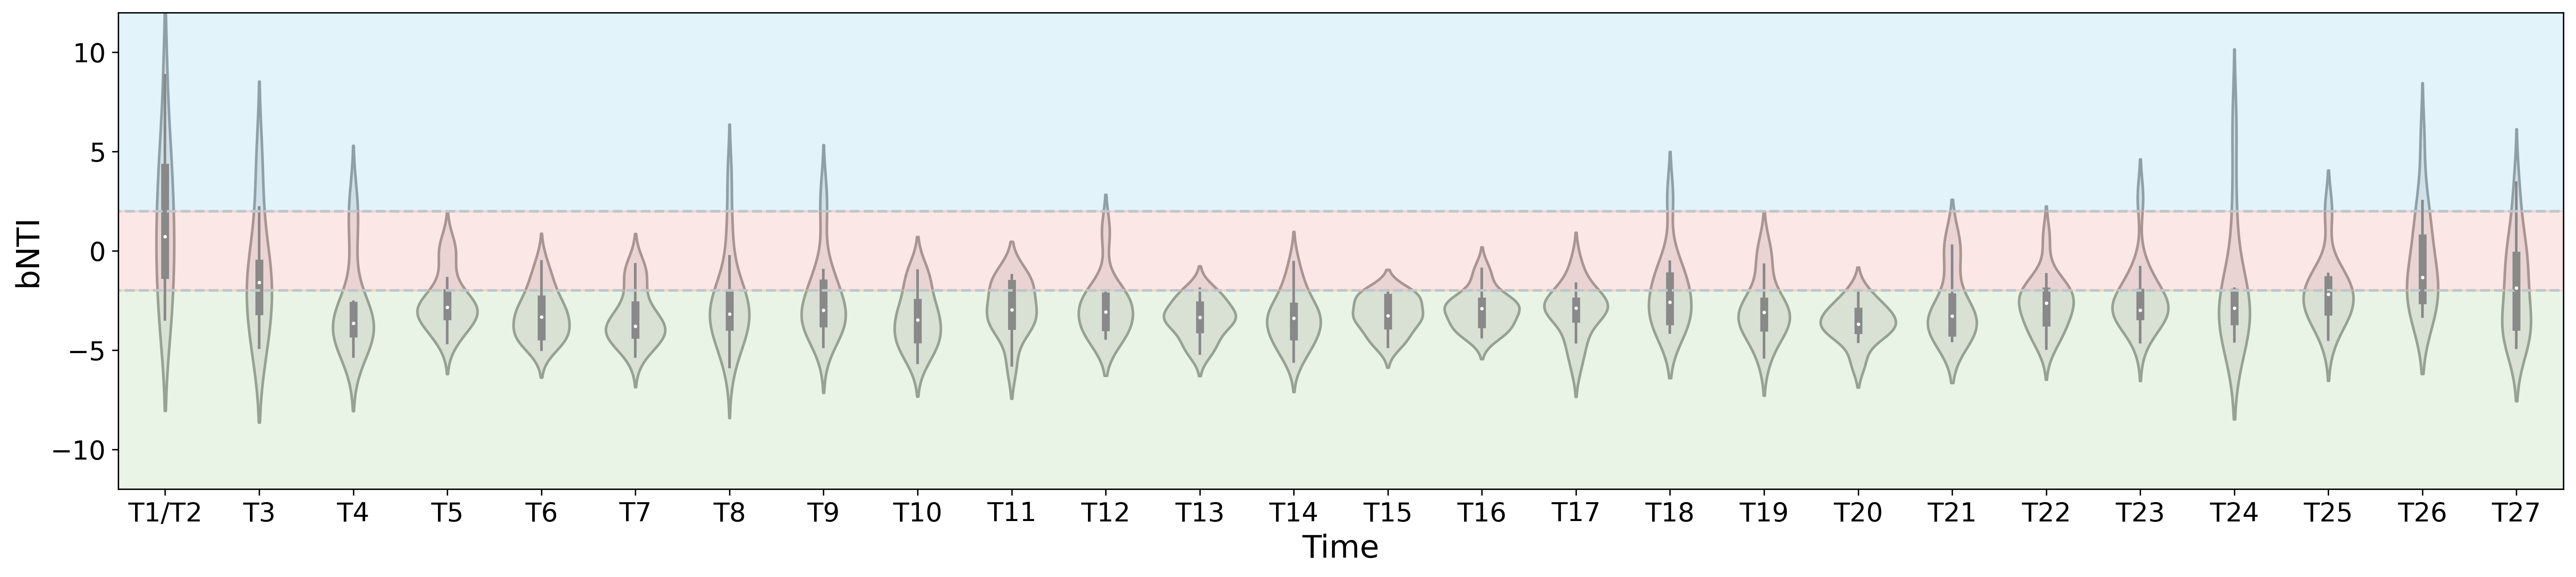

In [67]:
fig = plt.figure(figsize=(25, 5), dpi=300)
ax = plt.subplot(1,1,1)
_ = sns.violinplot(x="Time", y="bNTI", data=res_NTI, width=0.8, color='#e5e4e6')
_ = plt.axhline(y=2, xmin=-0.5, xmax=26.5, ls='--', color='#c0c6c9')
_ = plt.axhline(y=-2, xmin=-0.5, xmax=26.5, ls='--', color='#c0c6c9')

import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
patches = []
rect = mpatches.Rectangle([-0.5, 2], 26, 12, ec="none")
patches.append(rect)
rect = mpatches.Rectangle([-0.5, -2], 26, -12, ec="none")
patches.append(rect)
rect = mpatches.Rectangle([-0.5, -2], 26, 4, ec="none")
patches.append(rect)
collection = PatchCollection(patches, color=['#a0d8ef', '#badcad', '#f5b1aa'], alpha=0.3)
_ = ax.add_collection(collection)
_ = plt.ylim([-12, 12])
xtick_labels = ['T1/T2']+Times[3:]
_ = plt.xticks(range(26), xtick_labels, fontsize=15)
_ = plt.yticks(fontsize=15)
_ = plt.xlabel('Time', fontsize=18)
_ = plt.ylabel('bNTI', fontsize=18)
fig.savefig('../Results_0609/5.1. QPEN儿童种群形成情况_bNTI.pdf', dpi=300)

# 2. Influence of mother's flora on children

In [4]:
qpen.head(2)

,ratio.Heterogeneous.Selection,ratio.Homogeneous.Selection,ratio.Dispersal.Limitation,ratio.Homogenizing.Dispersal,ratio.Undominated,ratio.num.pair,result.sample1,result.sample2,result.bMNTD,result.BC,result.bNTI,result.RC,result.process
0,0.207116,0.414685,0.230957,0.01977,0.127472,108345,C1_11,C11_10,0.365784,0.994853,10.764065,1.0,Heterogeneous.Selection
1,0.207116,0.414685,0.230957,0.01977,0.127472,108345,C1_12,C11_10,0.386254,0.998496,8.110962,1.0,Heterogeneous.Selection


In [5]:
index = 'result.bNTI'
index_dict = {}
for i in qpen.index:
    index_dict[tuple(sorted(qpen.loc[i, ['result.sample1', 'result.sample2']].values))] = qpen.loc[i, index]

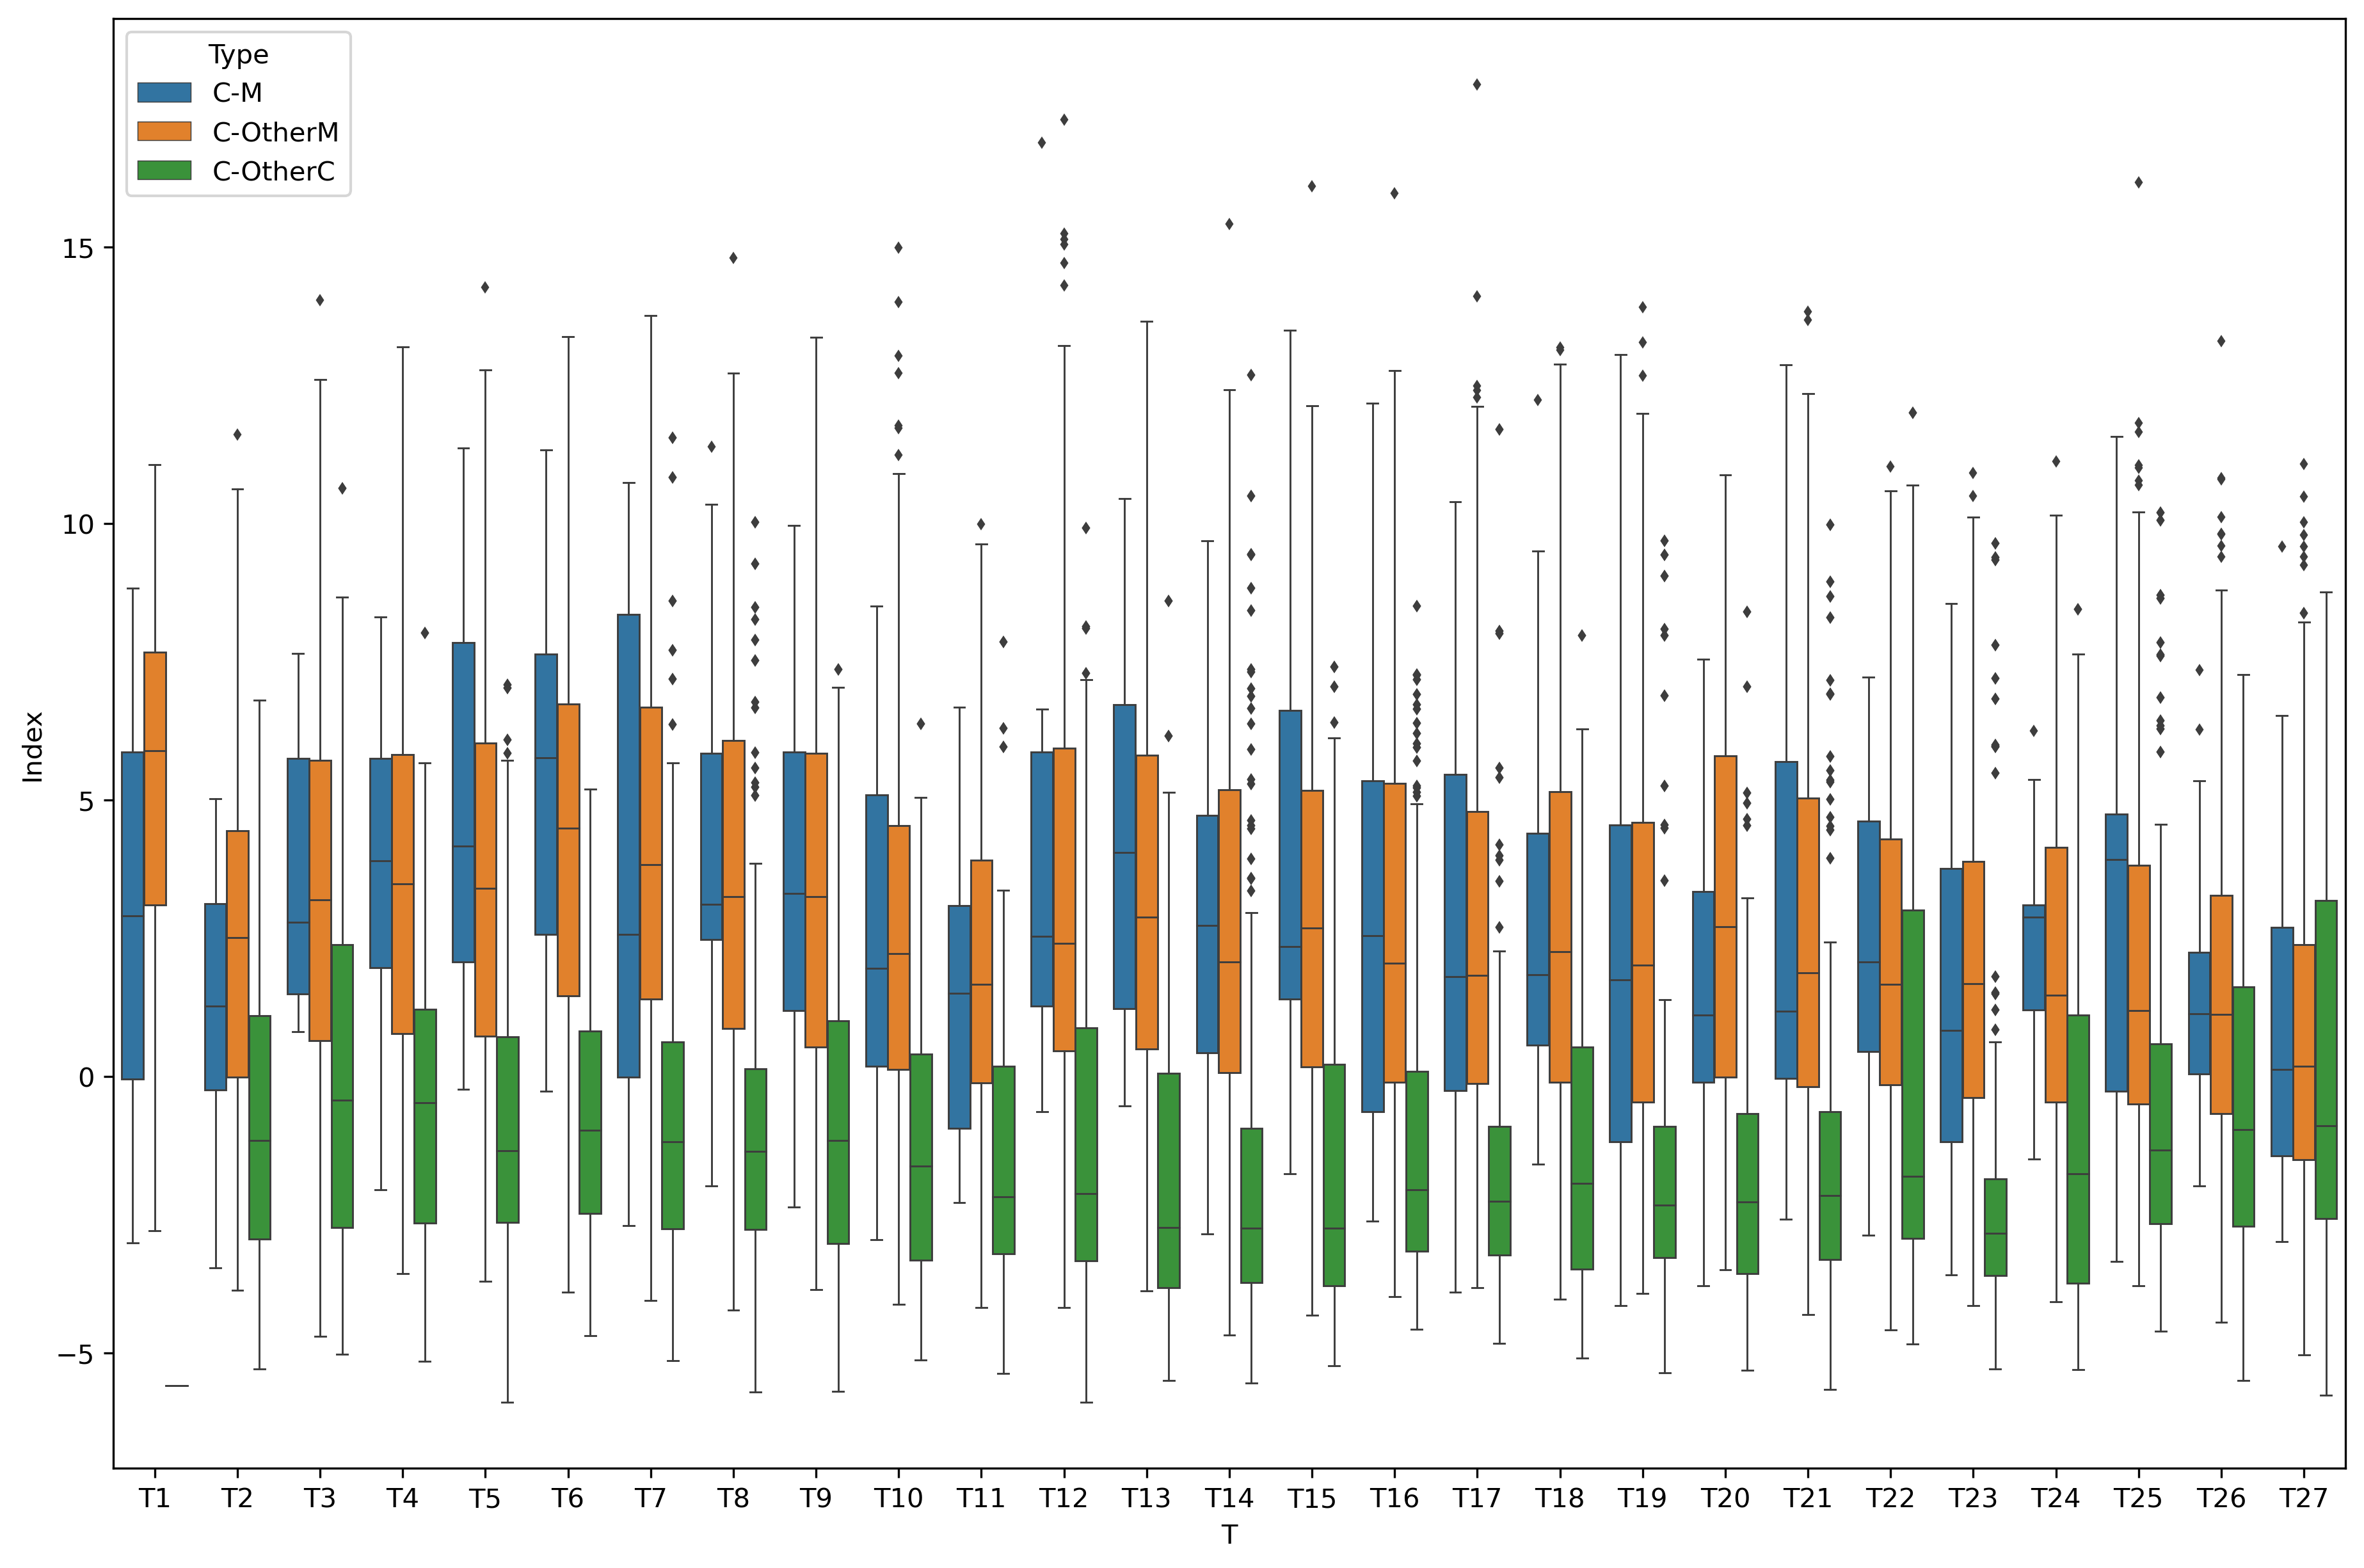

In [6]:
results = []
Times = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 
         'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27']
mom_samples = [i for i in meta.index if '_M' in i]
for t in Times:
    samples = meta.loc[meta['Time']==t, :].index.values
    samples = [(i, meta.loc[i, 'MotherID']) for i in samples]
    for cid0, mid0 in samples:
        # 1. 儿童-母亲
        if str(mid0)!='nan':
            results.append([t, 'C-M', index_dict[tuple(sorted([cid0, mid0]))]])
        # 2. 儿童-其他成人
        for mid in mom_samples:
            if mid != mid0:
                results.append([t, 'C-OtherM', index_dict[tuple(sorted([cid0, mid]))]])
        # 3. 儿童-同期儿童
        for cid, _ in samples:
            if cid != cid0:
                results.append([t, 'C-OtherC', index_dict[tuple(sorted([cid0, cid]))]])
results = pd.DataFrame(results, columns=['T', 'Type', 'Index'])
fig = plt.figure(figsize=(15, 10), dpi=300)
_ = sns.boxplot(x="T", y="Index", hue='Type', data=results, order=Times, fliersize=2, linewidth=0.7)

# 3. Influence of delivery mode

In [14]:
Times = ['M', 'T1', 'T2']
types = ['Heterogeneous.Selection', 'Homogeneous.Selection', 'Dispersal.Limitation', 
         'Homogenizing.Dispersal', 'Undominated']

for t in Times[2:]:
    if int(t[1:])<=2:
        samples = set(meta.loc[(meta['Time']=='T1')|(meta['Time']=='T2'), :].index)
        pairs = []
        for i in samples:
            if 'M'+i.split('_')[0][1:]+'_M' in meta.index:
                pairs.append(['M'+i.split('_')[0][1:]+'_M', i])
    select_ids = []
    for pair in pairs:
        for i in qpen.index:
            if qpen.loc[i, 'result.sample1'] in pair and qpen.loc[i, 'result.sample2'] in pair:
                select_ids.append(i)
                break
results = qpen.loc[select_ids, :]

In [23]:
results['DeliveryMode'] = meta.loc[results['result.sample2'].values, 'Mode of delivery'].values

In [24]:
results

,ratio.Heterogeneous.Selection,ratio.Homogeneous.Selection,ratio.Dispersal.Limitation,ratio.Homogenizing.Dispersal,ratio.Undominated,ratio.num.pair,result.sample1,result.sample2,result.bMNTD,result.BC,result.bNTI,result.RC,result.process,DeliveryMode
105715,0.207116,0.414685,0.230957,0.01977,0.127472,108345,M35_M,C35_2,0.141686,0.993722,1.267841,1.000,Dispersal.Limitation,C-section
67864,0.207116,0.414685,0.230957,0.01977,0.127472,108345,M19_M,C19_2,0.162026,0.935307,-0.614310,0.420,Undominated,Vaginal
84684,0.207116,0.414685,0.230957,0.01977,0.127472,108345,M26_M,C26_2,0.296147,1.000000,4.158191,1.000,Heterogeneous.Selection,C-section
99956,0.207116,0.414685,0.230957,0.01977,0.127472,108345,M32_M,C32_2,0.077702,0.997179,-3.460785,1.000,Homogeneous.Selection,C-section
59192,0.207116,0.414685,0.230957,0.01977,0.127472,108345,M18_M,C18_1,0.042562,0.950532,-3.011504,1.000,Homogeneous.Selection,C-section
89617,0.207116,0.414685,0.230957,0.01977,0.127472,108345,M28_M,C28_2,0.167140,0.989044,0.118813,1.000,Dispersal.Limitation,C-section
106966,0.207116,0.414685,0.230957,0.01977,0.127472,108345,M4_M,C4_2,0.203875,0.997897,0.179594,0.998,Dispersal.Limitation,C-section
93804,0.207116,0.414685,0.230957,0.01977,0.127472,108345,M29_M,C29_2,0.268606,0.923837,5.015578,0.606,Heterogeneous.Selection,Vaginal
105417,0.207116,0.414685,0.230957,0.01977,0.127472,108345,M35_M,C35_1,0.161679,0.942754,8.826784,1.000,Heterogeneous.Selection,C-section
24075,0.207116,0.414685,0.230957,0.01977,0.127472,108345,M12_M,C12_2,0.220294,0.944000,4.307585,1.000,Heterogeneous.Selection,Vaginal
